## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [47]:
# Checking the number of mice.
micenum = combined_data["Mouse ID"].nunique()
micenum

249

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
micedupes = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(micedupes)

['g989']


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(micedupes) == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Checking the number of mice in the clean DataFrame.
cleanmicenum = clean_data["Mouse ID"].nunique()
cleanmicenum

248

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = clean_data.loc[:, ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = summary.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = summary.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var = summary.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev = summary.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = summary.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
regimendata = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance": var, "Standard Deviation": stdev, "SEM": sem})
regimendata.round(2)

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [52]:
# Using the aggregation method, produce the same summary statistics in a single line
regimendata.agg("mean", axis= "rows")

Mean Tumor Volume      50.975982
Median Tumor Volume    49.902123
Variance               47.858440
Standard Deviation      6.821103
SEM                     0.502785
dtype: float64

## Bar and Pie Charts

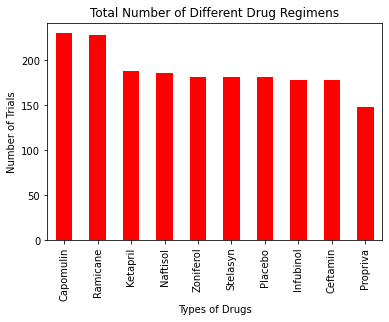

In [53]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugs = clean_data["Drug Regimen"].value_counts()
x_axis = drugs.index
y_axis = drugs.values
drugs.plot(kind= "bar", facecolor= "red")
plt.xlabel("Types of Drugs")
plt.ylabel("Number of Trials")
plt.title("Total Number of Different Drug Regimens")
plt.show() 

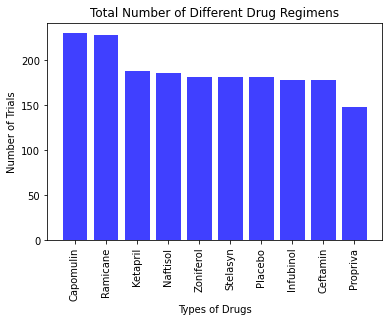

In [54]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugtwo = clean_data["Drug Regimen"].value_counts()
x_axis = np.arange(0, len(y_axis), 1)
y_axis = drugtwo.values
x_drug = drugtwo.index
plt.bar(x_drug, y_axis, color= "blue", alpha= 0.75)
plt.xlabel("Types of Drugs")
plt.ylabel("Number of Trials")
plt.title("Total Number of Different Drug Regimens")
plt.xticks(rotation=90)
plt.show()

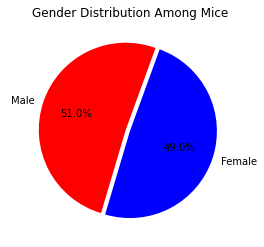

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderdist = clean_data["Sex"].value_counts()
sizes = genderdist.values
labels = genderdist.values
colors = ["Red", "Blue"]
explode = [0.05, 0]
genderdist.plot(kind="pie", colors= colors, explode= explode, autopct= "%1.1f%%", startangle= 70)
plt.title("Gender Distribution Among Mice")
plt.ylabel(" ")
plt.show()

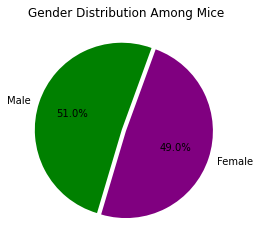

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderdisttwo = clean_data["Sex"].value_counts()
sizes = genderdisttwo.values
labels = genderdisttwo.index
colors = ["Green", "Purple"]
explode = [0.05, 0]
plt.pie(sizes, labels= labels, colors= colors, explode= explode, autopct= "%1.1f%%", startangle= 70)
plt.title("Gender Distribution Among Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_data = clean_data.loc[clean_data["Drug Regimen"].isin(['Ramicane', 'Infubinol', 'Ceftamin', 'Capomulin'])]

# Start by getting the last (greatest) timepoint for each mouse
max_data = drug_data.groupby('Mouse ID')['Timepoint'].max()
max_data.reset_index()
max_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumorvol_df = pd.merge(drug_data, max_data, on=['Mouse ID', 'Timepoint'])
tumorvol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
boxdata = tumorvol_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
box_df = pd.DataFrame(boxdata)
box_df.reset_index(inplace= True)
box_df

for column in box_df["Drug Regimen"]:
    treatment.append(column)
treatment
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# Add subset 
# Determine outliers using upper and lower bounds
for drug in treatment:
    outdf = tumorvol_df.loc[(tumorvol_df["Drug Regimen"] == drug)]
    volume = outdf["Tumor Volume (mm3)"]
    
    quartiles = volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    
    outliers = [vol for vol in volume if vol < lowerbound or vol > upperbound]
    if len(outliers) == 0:
        print(f'There are {len(outliers)} outliers for {drug} volumes')
    else:
        print(f'There are {len(outliers)} outliers for {drug} volumes: {outliers}')

There are 0 outliers for Capomulin volumes
There are 0 outliers for Ceftamin volumes
There are 1 outliers for Infubinol volumes: [36.321345799999996]
There are 0 outliers for Ramicane volumes


<function matplotlib.pyplot.show(*args, **kw)>

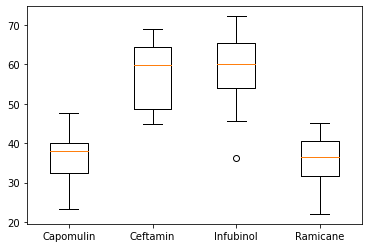

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = tumorvol_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
box = pd.DataFrame(boxplot)
box.reset_index(inplace= True)

volume = [vol for vol in box["Tumor Volume (mm3)"]]
plt.boxplot(volume, labels= treatment)
plt.show

## Line and Scatter Plots

Text(0.5, 1.0, 'm601 Treated w/ Capolumin')

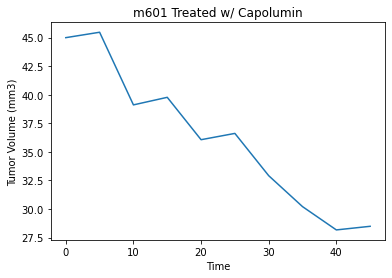

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumortime = clean_data.loc[clean_data["Mouse ID"] == "x401"]
timepoint = np.arange(0,50,5)
volume = tumortime['Tumor Volume (mm3)']

plt.plot(timepoint, volume)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("m601 Treated w/ Capolumin")

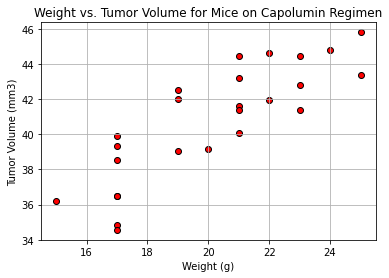

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
volumevsweight = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
vwmean = volumevsweight.groupby(["Mouse ID"]).mean()
plt.scatter(vwmean["Weight (g)"], vwmean["Tumor Volume (mm3)"], facecolors= "red", edgecolors= "black")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs. Tumor Volume for Mice on Capolumin Regimen")
plt.grid()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(vwmean["Weight (g)"], vwmean["Tumor Volume (mm3)"])
regress = vwmean["Weight (g)"]* slope + intercept
line = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(vwmean["Weight (g)"], vwmean["Tumor Volume (mm3)"] )
plt.plot(vwmean["Weight (g)"], regress, color = 'yellow')
plt.annotate(line,(20,36), color = 'skyblue', fontsize=15)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs. Tumor Volume for Mice on Capomulin Regimen")
plt.show()